In [2]:
from sklearn.datasets import load_iris

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()

# Convert to a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_name'] = iris_df['target'].map({i: name for i, name in enumerate(iris.target_names)})

# Display the DataFrame
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


In [4]:
iris_df = iris_df.iloc[:, :-1]

In [5]:
df = iris_df
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df = df[df['target']!=0][['sepal width (cm)', 'petal length (cm)', 'target']]

In [7]:
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

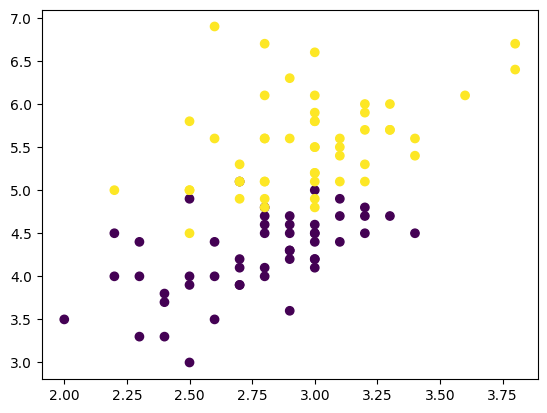

In [9]:
plt.scatter(df['sepal width (cm)'], df['petal length (cm)'], c = df['target'])

In [10]:
df.shape

(100, 3)

In [11]:
df = df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80, :].sample(5)
df_test = df.iloc[80:, :].sample(5)

In [12]:
x_test = df_val.iloc[:, :2].values
y_test = df_val.iloc[:, -1].values

In [13]:
x_test

array([[3.8, 6.4],
       [3. , 4.6],
       [2.9, 3.6],
       [2.9, 4.3],
       [2.5, 5. ]])

In [14]:
# Bagging
df_bag = df_train.sample(8, replace = True)

x = df_bag.iloc[:, :2]
y = df_bag.iloc[:, -1]

df_bag

,sepal width (cm),petal length (cm),target
128,2.8,5.6,2
122,2.8,6.7,2
128,2.8,5.6,2
125,3.2,6.0,2
140,3.1,5.6,2
66,3.0,4.5,1
65,3.1,4.4,1
61,3.0,4.2,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [16]:
df_bag1 = DecisionTreeClassifier()

In [20]:
def evaluate(clf, x, y):
    clf.fit(x, y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

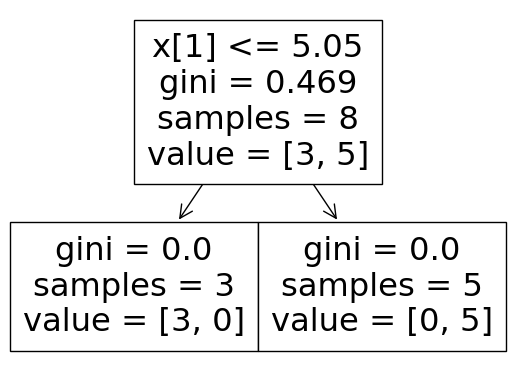

0.8


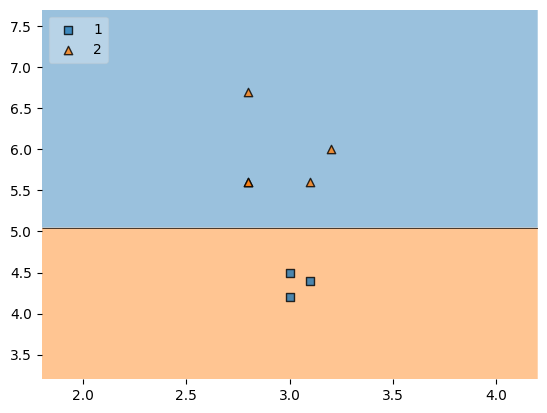

In [23]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
evaluate(df_bag1, x, y)

In [24]:
# Bagging
df_bag = df_train.sample(8, replace = True)

x = df_bag.iloc[:, :2]
y = df_bag.iloc[:, -1]

df_bag

,sepal width (cm),petal length (cm),target
102,3.0,5.9,2
61,3.0,4.2,1
122,2.8,6.7,2
58,2.9,4.6,1
66,3.0,4.5,1
61,3.0,4.2,1
61,3.0,4.2,1
66,3.0,4.5,1


In [25]:
df_bag2 = DecisionTreeClassifier()

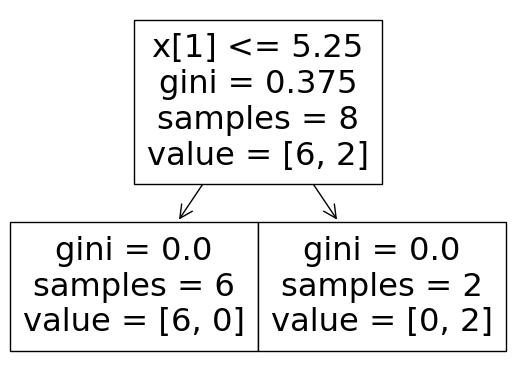

0.8


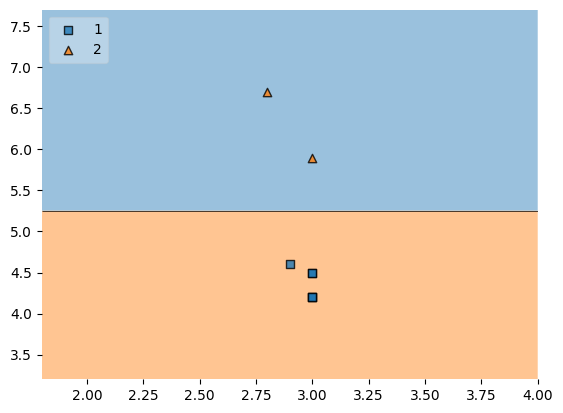

In [26]:
evaluate(df_bag2, x, y)

In [27]:
# Bagging
df_bag = df_train.sample(8, replace = True)

x = df_bag.iloc[:, :2]
y = df_bag.iloc[:, -1]

df_bag

,sepal width (cm),petal length (cm),target
125,3.2,6.0,2
140,3.1,5.6,2
140,3.1,5.6,2
66,3.0,4.5,1
102,3.0,5.9,2
66,3.0,4.5,1
65,3.1,4.4,1
58,2.9,4.6,1


In [28]:
df_bag3 = DecisionTreeClassifier()

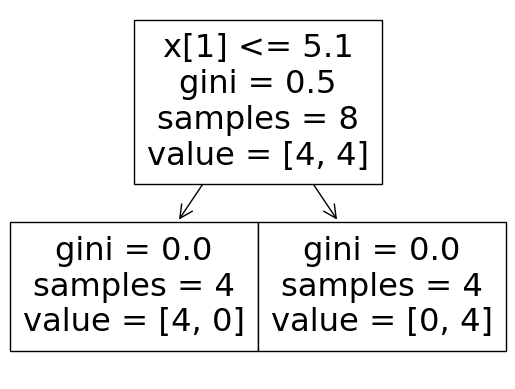

0.8


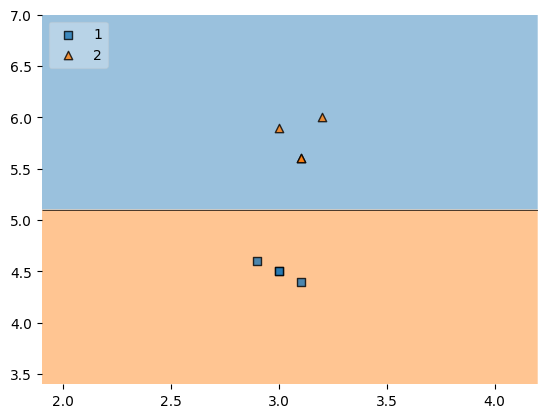

In [29]:
evaluate(df_bag3, x, y)

In [33]:
import numpy as np
print("Predictor 1:- ", df_bag1.predict(np.array([3.2, 4.7]).reshape(1, 2)))
print("Predictor 2:- ", df_bag2.predict(np.array([3.2, 4.7]).reshape(1, 2)))
print("Predictor 3:- ", df_bag3.predict(np.array([3.2, 4.7]).reshape(1, 2)))

Predictor 1:-  [1]
Predictor 2:-  [1]
Predictor 3:-  [1]


# Thank you